In [14]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


DESCRIPTION OF DATASET

In [3]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


VISUALIZATION

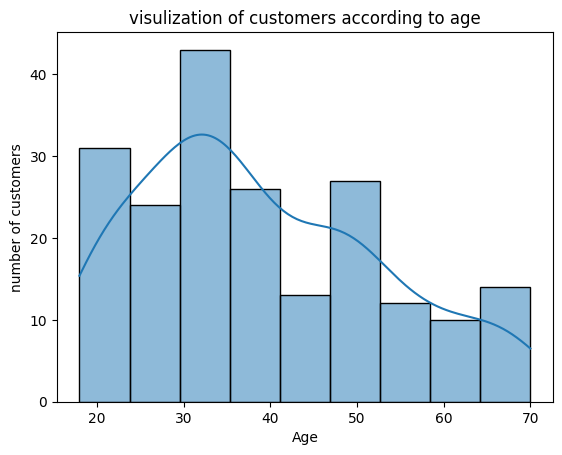

In [28]:
#visulization of customers according to age

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.xlabel("Age")
plt.ylabel("number of customers")
plt.title("visulization of customers according to age")
plt.show()

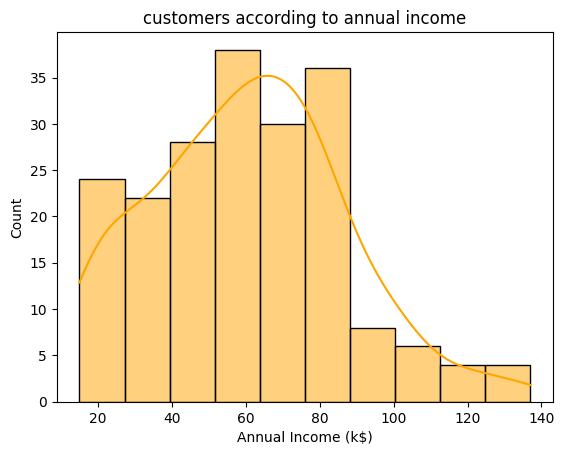

In [27]:
#visualization of customers according to annual income

sns.histplot(df["Annual Income (k$)"], kde=True,color='orange')
plt.title('customers according to annual income')
plt.show()

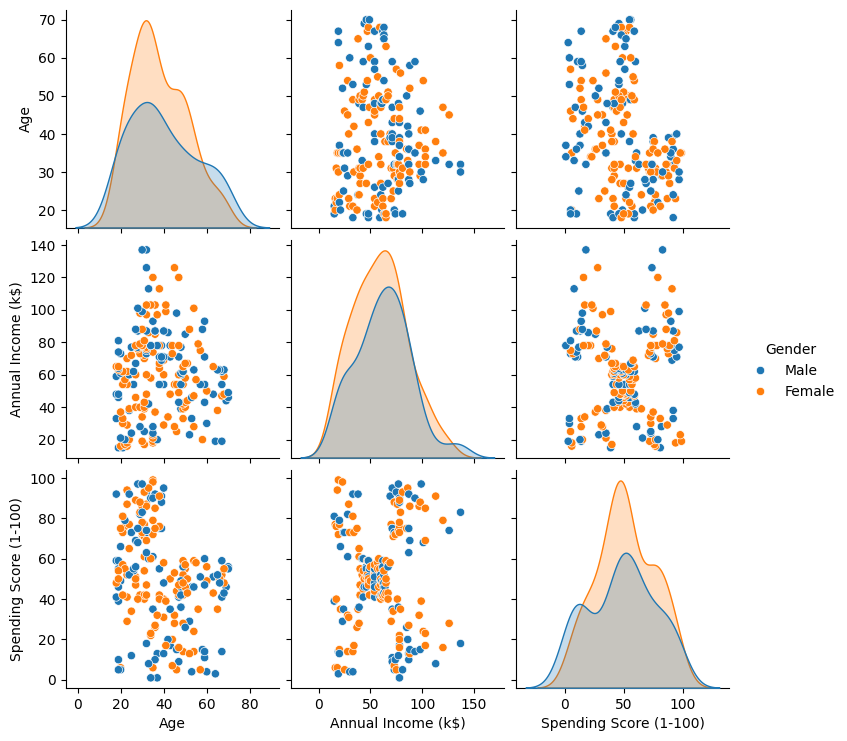

In [26]:
#pair plot

import seaborn as sns
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')


K-MEANS ALGORITHM IMPLEMENTATION

Optimal number of clusters: 4


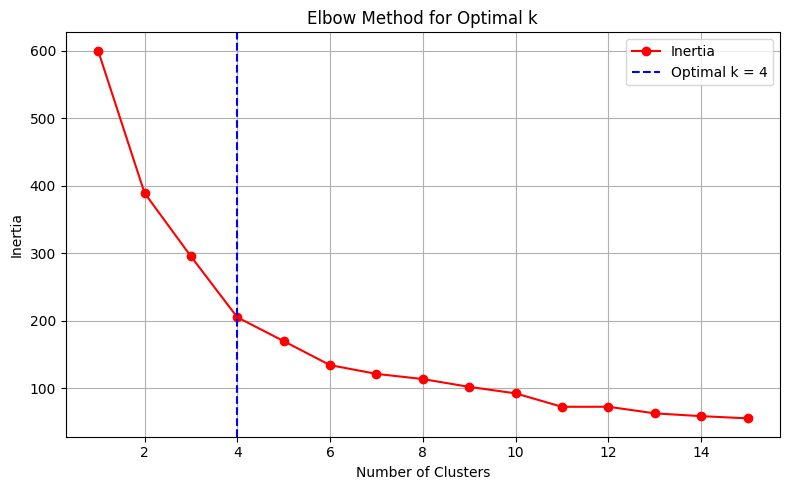

In [25]:
#SSE study to find optimal number of k for K=means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Step 2: Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Compute inertia for k = 1 to 15
inertia = []
k_range = range(1, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 5: Use KneeLocator to find the optimal k
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(f"Optimal number of clusters: {optimal_k}")

# Step 6: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='red', label='Inertia')
plt.axvline(x=optimal_k, color='blue', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Apply KMeans with the optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


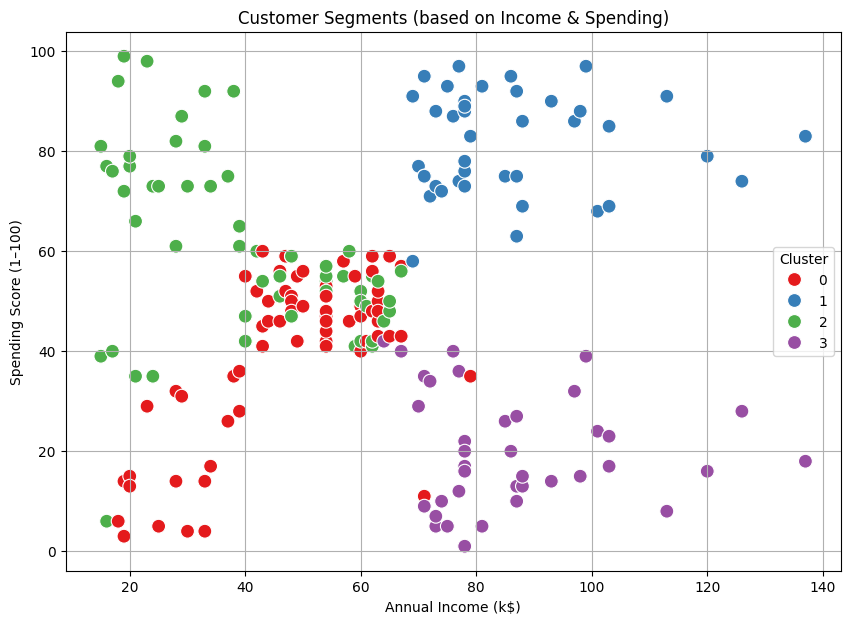

In [23]:
#visualization of clustering using 2D scatter plot of "spending vs national income"
import seaborn as sns
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='Set1', 
    s=100
)
plt.title('Customer Segments (based on Income & Spending)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


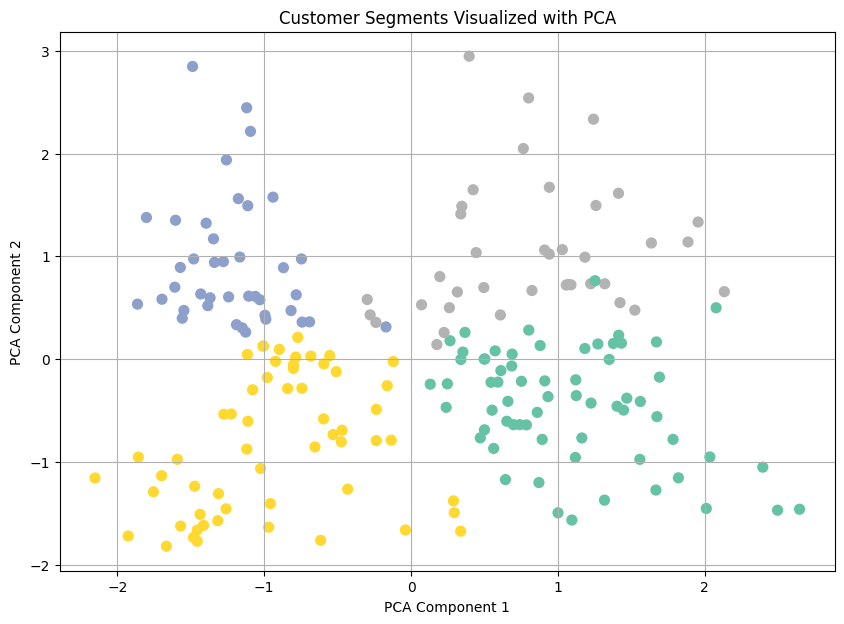

In [21]:
#visualization of clustering usingPCA plot for simplistic view

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='Set2', s=50)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [20]:
#analysis of cluster charecteristics

cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947
